# Colab Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Upload kaggle.json file
from google.colab import files
files.upload()

In [ ]:
!pip install -q kaggle
!pip install -q pydub
!pip install -q transformers
!pip install -q tensorboard

!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification
!unzip -q gtzan-dataset-music-genre-classification.zip
!mv Data data
!mv data/genres_original data/audio

# jazz.00054.wav is corrupted so we need to delete it
!rm ./data/audio/jazz/jazz.00054.wav

In [ ]:
# Set this to drive location of colab_version
%cd /content/drive/MyDrive/DL/colab_version

from utils import set_data_root_dir
set_data_root_dir('/content')

# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

from utils.train_utils import train, load_model
from utils.data_utils import setup_dataset, read_into_df, get_train_val, RawDS
from models.CombinedClassifier import CombinedClassifier, ASTPipeline
from models.CNNClassifier import CNNClassifier
from utils.analysis_utils import eval, gen_confusion_matrix, gen_tsne, gen_saliency

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device: %s" % device)

Using device: cuda


In [4]:
setup_dataset()
df = read_into_df()
class_map = dict(zip(df.labelId,df.label))
df.head()

Dataset already setup!


,file,label,labelId
0,/home/gigachad/DeepLearningProject/utils/../da...,jazz,5
1,/home/gigachad/DeepLearningProject/utils/../da...,jazz,5
2,/home/gigachad/DeepLearningProject/utils/../da...,jazz,5
3,/home/gigachad/DeepLearningProject/utils/../da...,jazz,5
4,/home/gigachad/DeepLearningProject/utils/../da...,jazz,5


# Combined Classifier

In [5]:
dataset = RawDS(df)
train_dl, val_dl = get_train_val(dataset, train_split=0.8, batch_size=16)

model = CombinedClassifier(device)
model.to(device)

num_epochs = 20
lr = 0.001
train(model, train_dl, val_dl, num_epochs, lr, device, 'CombinedClassifier_augmentations_trans-dropout')

Some weights of the model checkpoint at bookbot/distil-ast-audioset were not used when initializing ASTModel: ['classifier.layernorm.bias', 'classifier.layernorm.weight', 'classifier.dense.weight', 'classifier.dense.bias']
- This IS expected if you are initializing ASTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ASTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


-----------------------------------
Epoch 1
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 1.80 Accuracy: 0.41
Validation Loss: 1.08 Accuracy: 0.72
-----------------------------------
Epoch 2
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.87 Accuracy: 0.73
Validation Loss: 0.64 Accuracy: 0.80
-----------------------------------
Epoch 3
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.66 Accuracy: 0.78
Validation Loss: 0.52 Accuracy: 0.82
-----------------------------------
Epoch 4
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.58 Accuracy: 0.81
Validation Loss: 0.51 Accuracy: 0.83
-----------------------------------
Epoch 5
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.54 Accuracy: 0.81
Validation Loss: 0.48 Accuracy: 0.84
Checkpointing to /home/gigachad/DeepLearningProject/utils/../saves/checkpoints
-----------------------------------
Epoch 6
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.50 Accuracy: 0.83
Validation Loss: 0.44 Accuracy: 0.85
-----------------------------------
Epoch 7
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.45 Accuracy: 0.85
Validation Loss: 0.48 Accuracy: 0.85
-----------------------------------
Epoch 8
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.40 Accuracy: 0.86
Validation Loss: 0.43 Accuracy: 0.87
-----------------------------------
Epoch 9
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.37 Accuracy: 0.87
Validation Loss: 0.43 Accuracy: 0.86
-----------------------------------
Epoch 10
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.33 Accuracy: 0.88
Validation Loss: 0.41 Accuracy: 0.87
Checkpointing to /home/gigachad/DeepLearningProject/utils/../saves/checkpoints
-----------------------------------
Epoch 11
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.27 Accuracy: 0.90
Validation Loss: 0.40 Accuracy: 0.88
-----------------------------------
Epoch 12
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.26 Accuracy: 0.91
Validation Loss: 0.43 Accuracy: 0.87
-----------------------------------
Epoch 13
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.23 Accuracy: 0.92
Validation Loss: 0.38 Accuracy: 0.88
-----------------------------------
Epoch 14
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.18 Accuracy: 0.93
Validation Loss: 0.37 Accuracy: 0.88
-----------------------------------
Epoch 15
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.18 Accuracy: 0.94
Validation Loss: 0.40 Accuracy: 0.89
Checkpointing to /home/gigachad/DeepLearningProject/utils/../saves/checkpoints
-----------------------------------
Epoch 16
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.17 Accuracy: 0.94
Validation Loss: 0.37 Accuracy: 0.90
-----------------------------------
Epoch 17
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.16 Accuracy: 0.95
Validation Loss: 0.39 Accuracy: 0.90
-----------------------------------
Epoch 18
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.14 Accuracy: 0.95
Validation Loss: 0.37 Accuracy: 0.89
-----------------------------------
Epoch 19
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.14 Accuracy: 0.95
Validation Loss: 0.36 Accuracy: 0.90
-----------------------------------
Epoch 20
-----------------------------------


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Training Loss: 0.12 Accuracy: 0.96
Validation Loss: 0.36 Accuracy: 0.90
Checkpointing to /home/gigachad/DeepLearningProject/utils/../saves/checkpoints
Finished Training!


In [6]:
total = 0
for p in model.cnn.parameters():
    nn=1
    for s in list(p.size()):
        nn = nn*s
    total += nn

for p in model.linear1.parameters():
    nn=1
    for s in list(p.size()):
        nn = nn*s
    total += nn
    
for p in model.linear2.parameters():
    nn=1
    for s in list(p.size()):
        nn = nn*s
    total += nn
print(total)
# model.linear1.parameters()
# model.linear2.parameters()

126812


# Evaluation

In [26]:
model = CombinedClassifier(device)
load_model('./saves/CombinedClassifier_augmentations_trans-dropout.pt', model)
model.to(device)

Some weights of the model checkpoint at bookbot/distil-ast-audioset were not used when initializing ASTModel: ['classifier.layernorm.bias', 'classifier.layernorm.weight', 'classifier.dense.weight', 'classifier.dense.bias']
- This IS expected if you are initializing ASTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ASTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


CombinedClassifier(
  (ast_pipeline): ASTPipeline()
  (cnn_pipeline): CNNPipeline(
    (spec): MelSpectrogram(
      (spectrogram): Spectrogram()
      (mel_scale): MelScale()
    )
  )
  (cnn): Sequential(
    (conv1): Conv2d(1, 8, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
    (relu1): ReLU()
    (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pool1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(8, 10, kernel_size=(3, 3), stride=(1, 1))
    (relu2): ReLU()
    (bn2): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pool2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (ast_model): ASTModel(
    (embeddings): ASTEmbeddings(
      (patch_embeddings): ASTPatchEmbeddings(
        (projection): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder

In [7]:
dataset = RawDS(df)
train_dl, val_dl = get_train_val(dataset, train_split=0.8, batch_size=8)

In [16]:
values = eval(model, val_dl, ['cnn.pool2', 'relu2', 'ast_model.layernorm'])

  0%|          | 0/150 [00:00<?, ?it/s]

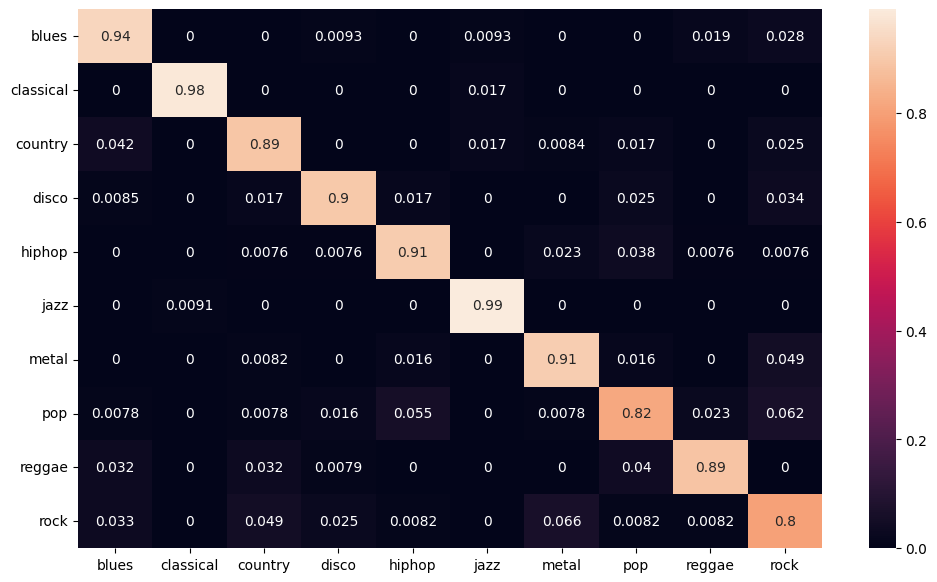

In [10]:
gen_confusion_matrix(values['label'], values['pred'], class_map)

/home/gigachad/DeepLearningProject/utils/analysis_utils.py:42: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(x="comp-1", y="comp-2", hue=df.label.tolist(),


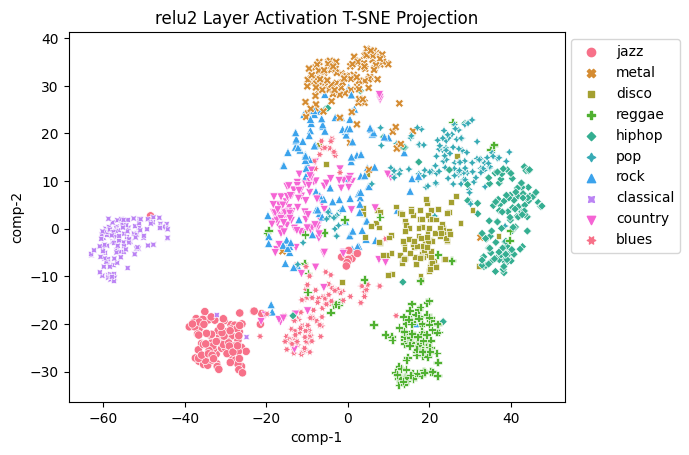

In [11]:
gen_tsne(['relu2'], values, class_map)

In [14]:
values['cnn.pool2'].shape
values['cnn'] = values['cnn.pool2'].view(values['cnn.pool2'].shape[0], -1)

/home/gigachad/DeepLearningProject/utils/analysis_utils.py:42: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(x="comp-1", y="comp-2", hue=df.label.tolist(),


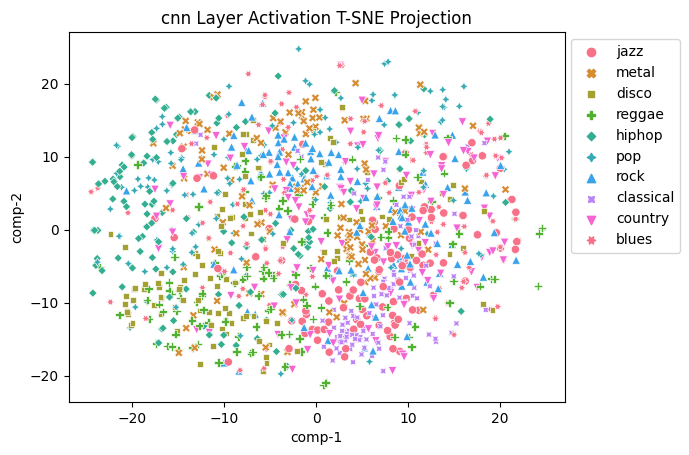

In [15]:
gen_tsne(['cnn'], values, class_map)

In [17]:
from utils.analysis_utils import get_input_from_file, get_content_loss

In [32]:
file = '/home/gigachad/DeepLearningProject/data/samples/classical/0_classical.00002.wav'
source = get_input_from_file(file)
target = get_input_from_file(file)

print(source.shape)
get_content_loss(model, source, target)

torch.Size([1, 80000])


tensor([1.0000])

In [28]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(saliency.shape[1]), saliency[0])

NameError: name 'saliency' is not defined

(1, 80000)

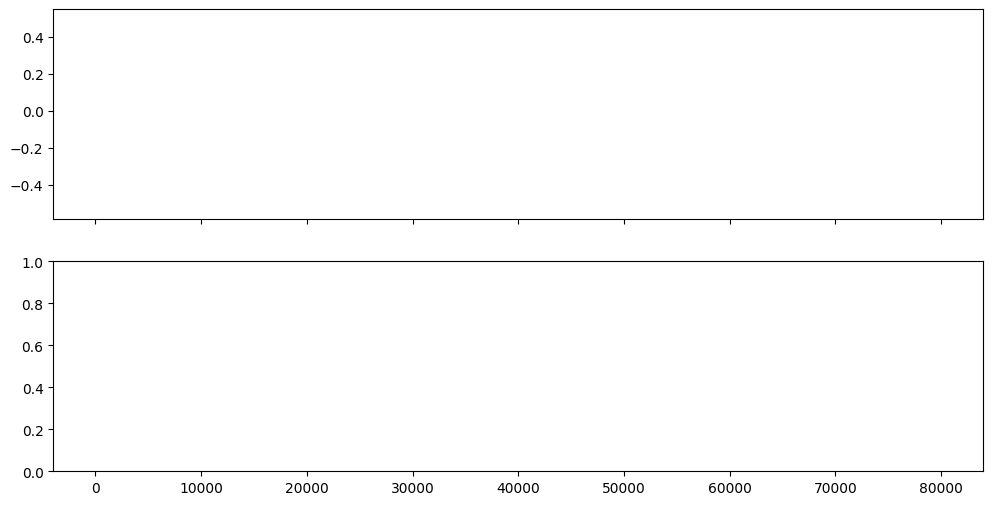

In [100]:
import librosa
import matplotlib
from matplotlib.collections import LineCollection
import matplotlib.cm as cm

file = '/home/gigachad/DeepLearningProject/data/samples/country/0_country.00002.wav'
y, sr = librosa.load(file, sr=16000)

saliency = gen_saliency(model, file)
saliency = saliency[0].numpy()
norm = matplotlib.colors.Normalize(vmin=saliency.min(), vmax=saliency.max())
cmap = cm.autumn
# hor_lc = LineCollection(saliency, cmap=cmap, norm=norm)
colors = cmap(norm(saliency))
hex_colors = [matplotlib.colors.rgb2hex(colors[i,:-1]) for i in range(colors.shape[0])]
# print(hex_colors)
# print(matplotlib.colors.rgb2hex(colors[:, :-1]))

# saliency = (saliency - np.min(saliency)) / (np.max(saliency) - np.min(saliency))
# print(saliency.shape)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))

for x_, y_, c_ in zip(np.arange(len(saliency)), y, hex_colors):
    ax[0].plot(x_, y_, color=c_)
# ax[0].add_collection(hor_lc)
# print(max(saliency), len(y))
# saliency = saliency.tolist()
# print(y)
# librosa.display.waveshow(y, sr=sr, ax=ax[0])
# librosa.display.waveshow(y, sr=sr, ax=ax[1], alpha=0.4)

# saliency = gen_saliency(model, file)
# saliency = saliency.numpy().T
# saliency = (saliency - np.min(saliency)) / (np.max(saliency) - np.min(saliency))
# print(saliency)
# librosa.display.specshow(saliency, sr=sr, hop_length=512, x_axis='time', y_axis='linear', cmap='viridis', alpha=0.8, ax=ax[1])

# ax[0].set(title='Audio waveform')
# ax[1].set(title='Saliency map overlay')
# ax[1].set(xlabel='Time (s)')
# ax[1].set(ylabel='Frequency (Hz)')

# Audio('/home/gigachad/DeepLearningProject/data/samples/country/0_country.00002.wav')

In [102]:
librosa.display.specshow(y, sr=sr)

IndexError: tuple index out of range